<a href="https://colab.research.google.com/github/DataMinati/TSA-Fauj/blob/main/Delhi_Climate_TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

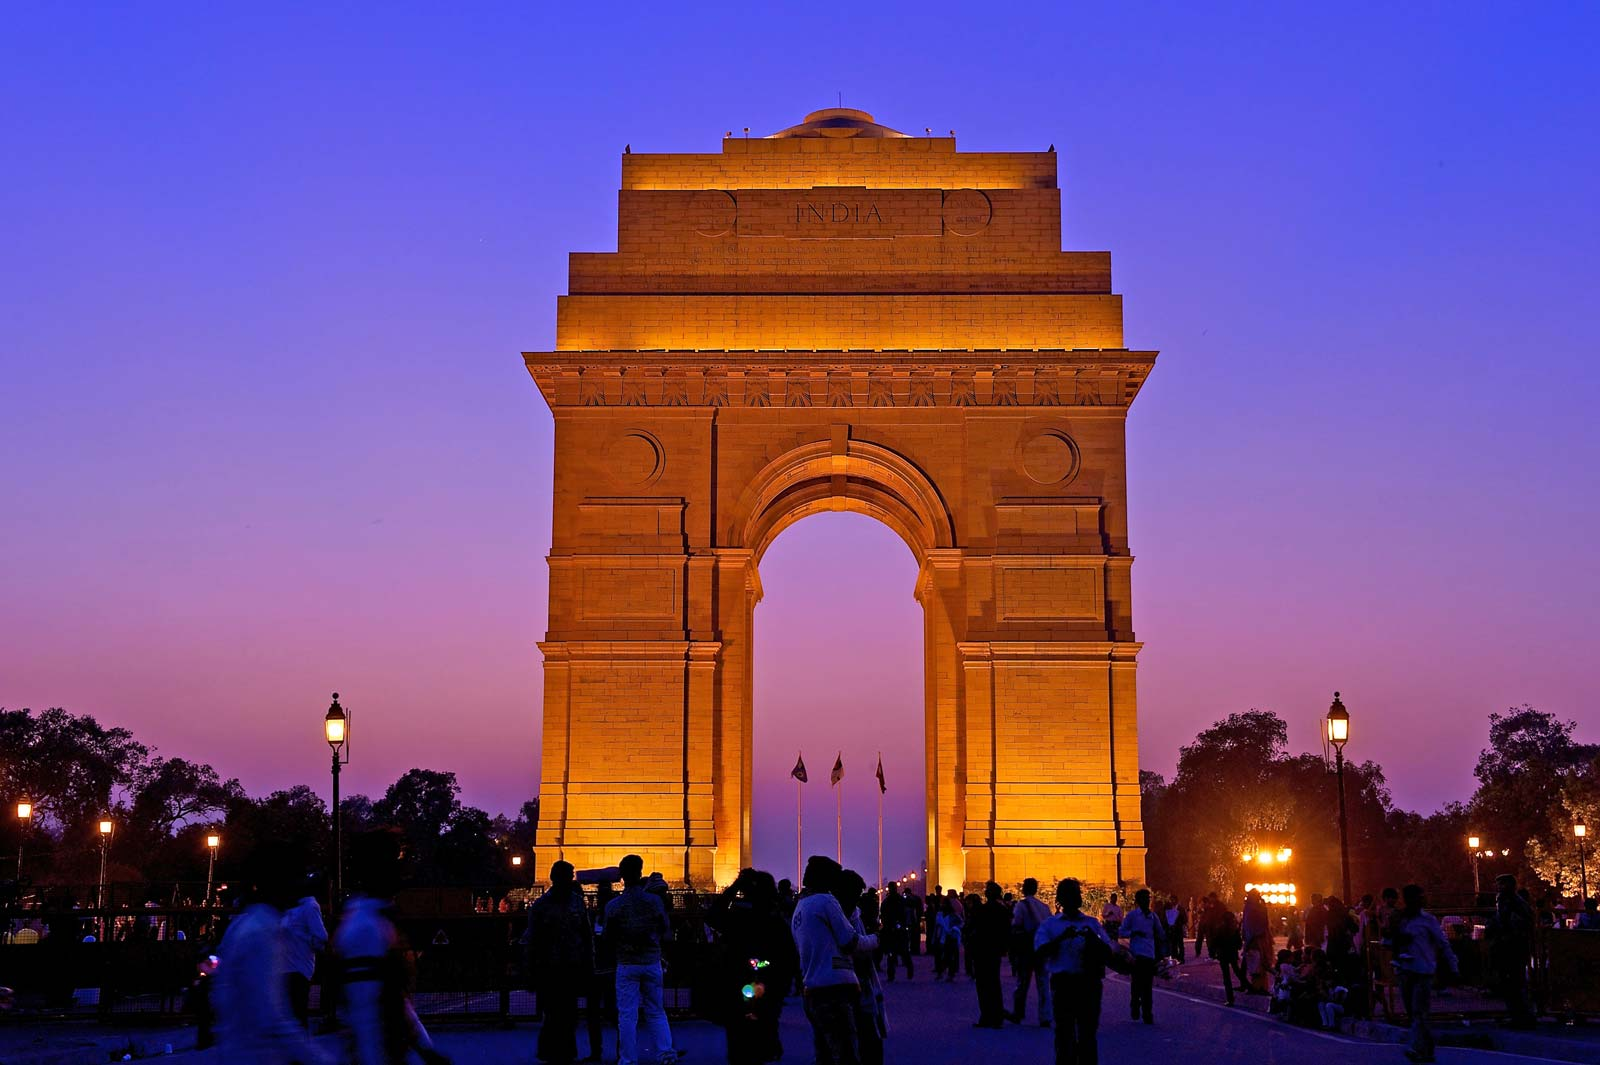

In [1]:
from IPython.display import Image
Image("https://cdn.britannica.com/37/189837-050-F0AF383E/New-Delhi-India-War-Memorial-arch-Sir.jpg")

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
import seaborn as sns

In [3]:
test = pd.read_csv('https://raw.githubusercontent.com/DataMinati/Datasets-/master/DailyDelhiClimateTest.csv')
train = pd.read_csv('https://raw.githubusercontent.com/DataMinati/Datasets-/master/DailyDelhiClimateTrain.csv')

In [4]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [6]:
train.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [7]:
test.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [8]:
train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [9]:
test.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [10]:
train.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [11]:
test.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [12]:
print(train.shape)
print(test.shape)

(1462, 5)
(114, 5)


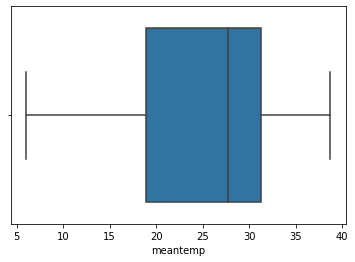

In [13]:
sns.boxplot(x=train['meantemp'])

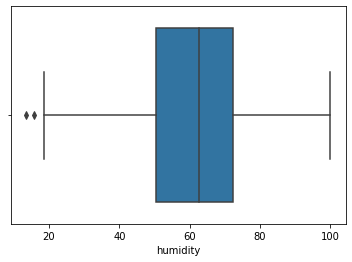

In [14]:
sns.boxplot(x=train['humidity'])

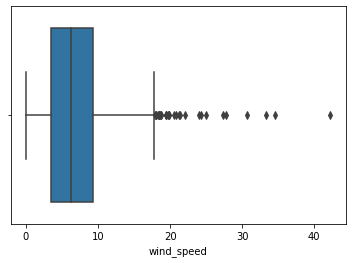

In [15]:
sns.boxplot(x=train['wind_speed'])

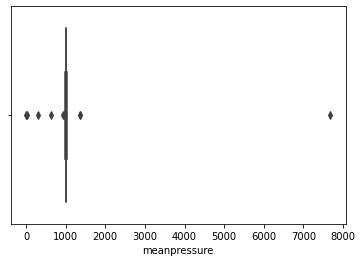

In [16]:
sns.boxplot(x=train['meanpressure'])

Text(0.5, 1.0, 'MeanPressure')

<Figure size 1440x720 with 0 Axes>

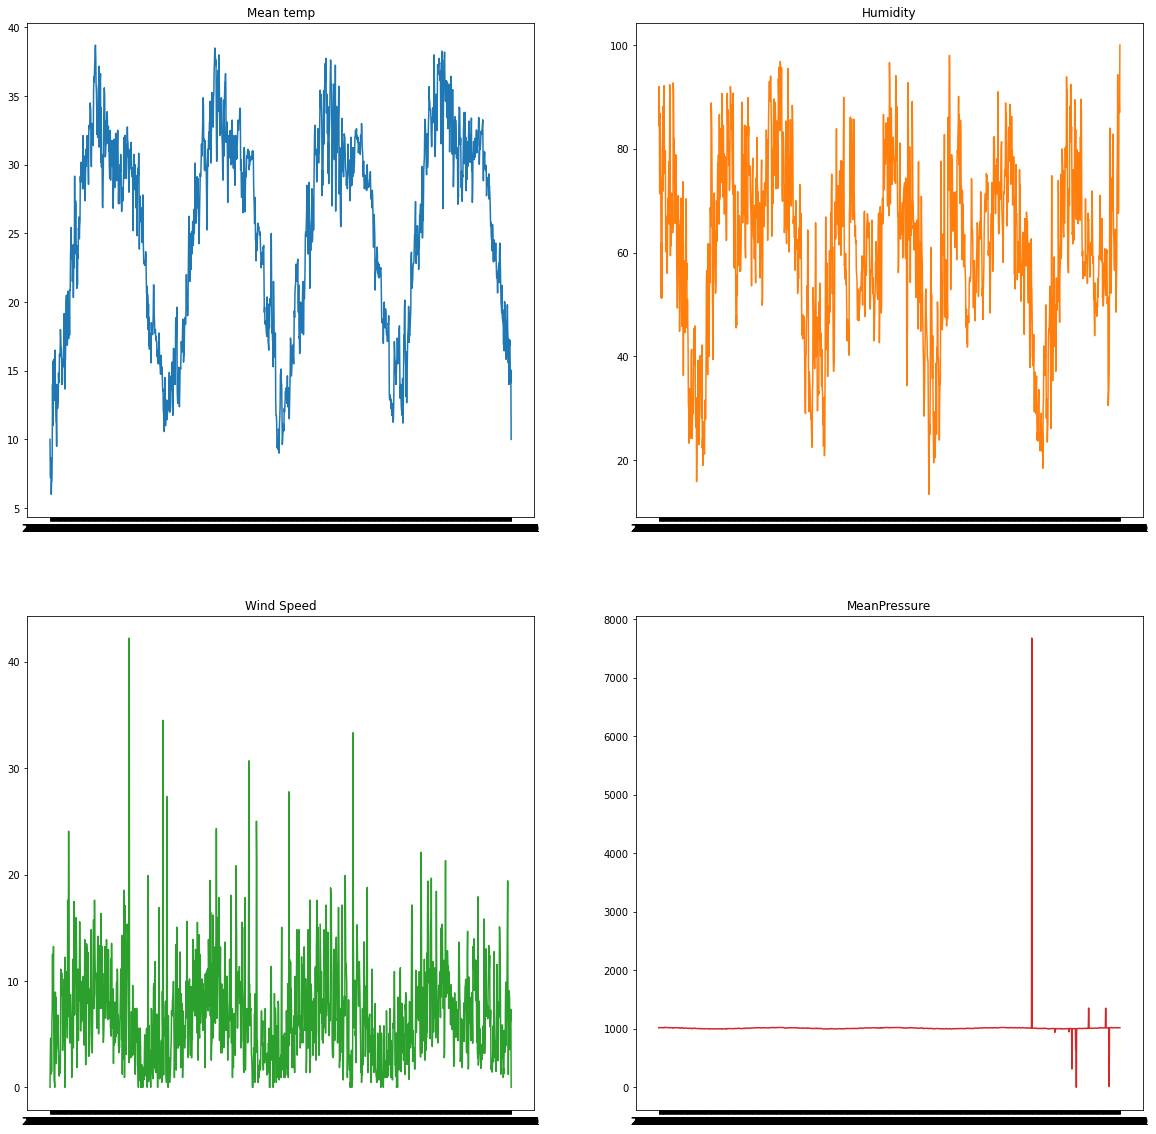

In [17]:
plt.figure(figsize=(20,10))
fig, axs = plt.subplots(2, 2,figsize=(20,20))
axs[0, 0].plot(train['date'],train['meantemp'])
axs[0, 0].set_title('Mean temp')
axs[0, 1].plot(train['date'],train['humidity'], 'tab:orange')
axs[0, 1].set_title('Humidity')
axs[1, 0].plot(train['date'],train['wind_speed'], 'tab:green')
axs[1, 0].set_title('Wind Speed')
axs[1, 1].plot(train['date'],train['meanpressure'], 'tab:red')
axs[1, 1].set_title('MeanPressure')

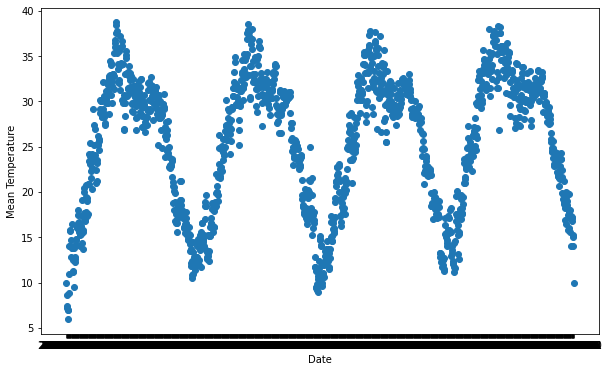

In [18]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train['date'], train['meantemp'])
ax.set_xlabel('Date')
ax.set_ylabel('Mean Temperature')
plt.show()

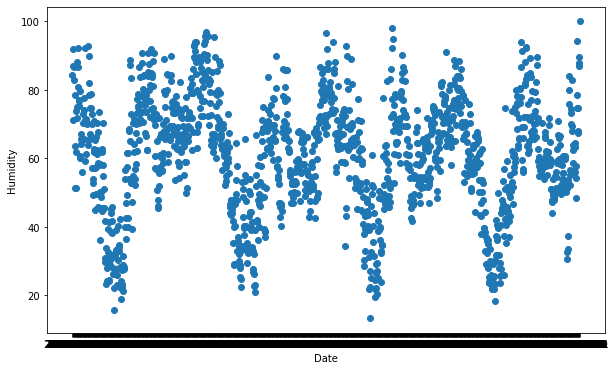

In [19]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train['date'], train['humidity'])
ax.set_xlabel('Date')
ax.set_ylabel('Humidity')
plt.show()

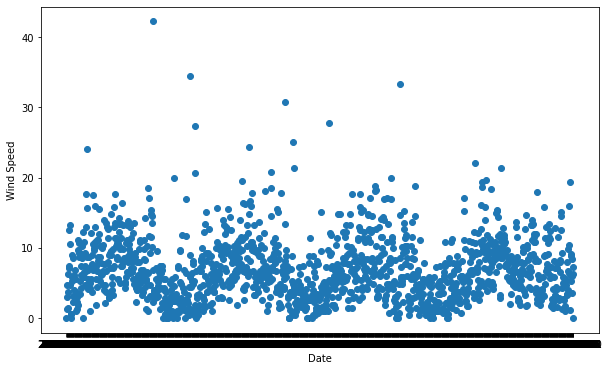

In [20]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train['date'], train['wind_speed'])
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed')
plt.show()

In [23]:
#Predicting Mean Temperature of Delhi

## MEAN TEMP 
temp_train = train.iloc[:,1:2]
temp_test = test.iloc[:,1:2]
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
temp_train= ss.fit_transform(temp_train)
temp_test= ss.fit_transform(temp_test)
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
look_back = 1
trainX, trainY = create_dataset(temp_train, look_back)
testX, testY = create_dataset(temp_test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))

In [24]:
# create and fit the LSTM network
model_temp = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_temp.add(LSTM(units = 100, return_sequences = True, input_shape = (trainX.shape[1], 1)))
model_temp.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_temp.add(LSTM(units = 100, return_sequences = True))
model_temp.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_temp.add(LSTM(units = 100, return_sequences = True))
model_temp.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_temp.add(LSTM(units = 50))
model_temp.add(Dropout(0.2))
# Adding the output layer
model_temp.add(Dense(units = 1))

# Compiling the RNN
model_temp.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
model_temp.fit(trainX, trainY, epochs = 100, batch_size = 32)


Epoch 1/100
46/46 [==============================] - 10s 13ms/step - loss: 0.2058 - accuracy: 6.8493e-04
Epoch 2/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0245 - accuracy: 0.0014
Epoch 3/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0147 - accuracy: 0.0014
Epoch 4/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0093 - accuracy: 0.0014
Epoch 5/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0082 - accuracy: 0.0014
Epoch 6/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0080 - accuracy: 0.0014
Epoch 7/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0070 - accuracy: 0.0014
Epoch 8/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0066 - accuracy: 0.0014
Epoch 9/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0068 - accuracy: 0.0014
Epoch 10/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0065 - accuracy: 0

In [25]:
# PREDICTION

prediction = model_temp.predict(testX)
prediction = ss.inverse_transform(prediction)
temp_test = ss.inverse_transform(temp_test)

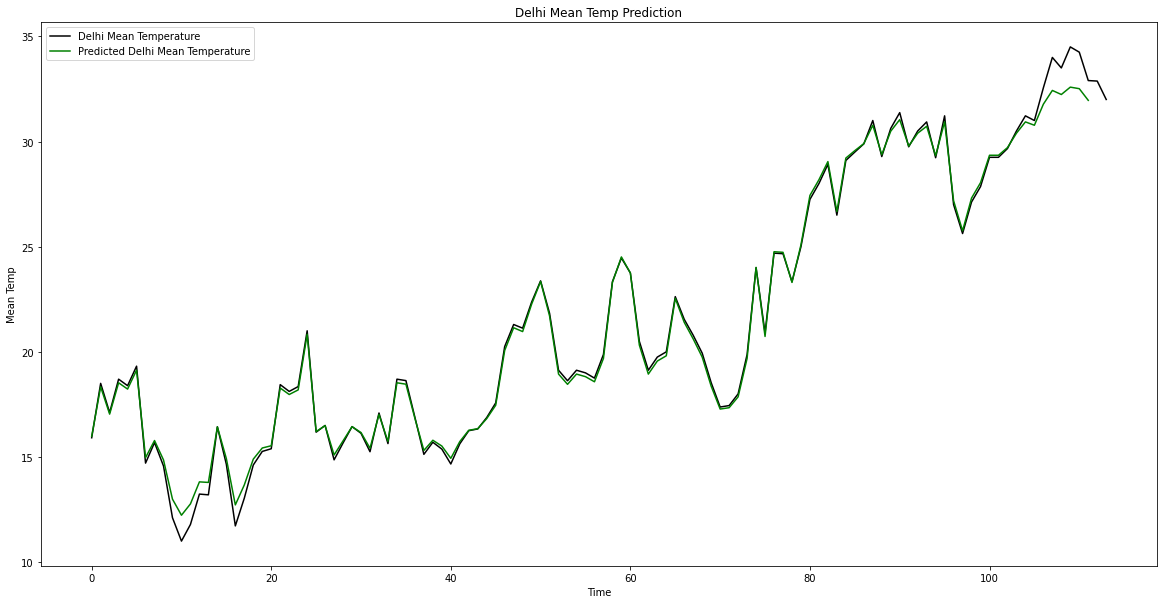

In [26]:
plt.figure(figsize=(20,10))
plt.plot(temp_test, color = 'black', label = 'Delhi Mean Temperature')
plt.plot(prediction, color = 'green', label = 'Predicted Delhi Mean Temperature')
plt.title('Delhi Mean Temp Prediction')
plt.xlabel('Time')
plt.ylabel('Mean Temp')
plt.legend()
plt.show()

In [27]:
# Humidity

humid_train = train.iloc[:,2:3]
humid_test = test.iloc[:,2:3]
#Scaling the values between 0 to 1

ss= MinMaxScaler(feature_range=(0,1))
humid_train= ss.fit_transform(humid_train)
humid_test= ss.fit_transform(humid_test)
look_back = 1
trainX, trainY = create_dataset(humid_train, look_back)
testX, testY = create_dataset(humid_test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))


In [29]:
# create and fit the LSTM network
model_humid = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_humid.add(LSTM(units = 100, return_sequences = True, input_shape = (trainX.shape[1], 1)))
model_humid.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_humid.add(LSTM(units = 100, return_sequences = True))
model_humid.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_humid.add(LSTM(units = 100, return_sequences = True))
model_humid.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_humid.add(LSTM(units = 50))
model_humid.add(Dropout(0.2))
# Adding the output layer
model_humid.add(Dense(units = 1))

# Compiling the RNN
model_humid.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
model_humid.fit(trainX, trainY, epochs = 100, batch_size = 32)

Epoch 1/100
46/46 [==============================] - 9s 14ms/step - loss: 0.1713 - accuracy: 6.8493e-04
Epoch 2/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0238 - accuracy: 6.8493e-04
Epoch 3/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0183 - accuracy: 6.8493e-04
Epoch 4/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0146 - accuracy: 6.8493e-04
Epoch 5/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0129 - accuracy: 6.8493e-04
Epoch 6/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0128 - accuracy: 6.8493e-04
Epoch 7/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0125 - accuracy: 6.8493e-04
Epoch 8/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0118 - accuracy: 6.8493e-04
Epoch 9/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0121 - accuracy: 6.8493e-04
Epoch 10/100
46/46 [==============================] - 1s 14ms/st

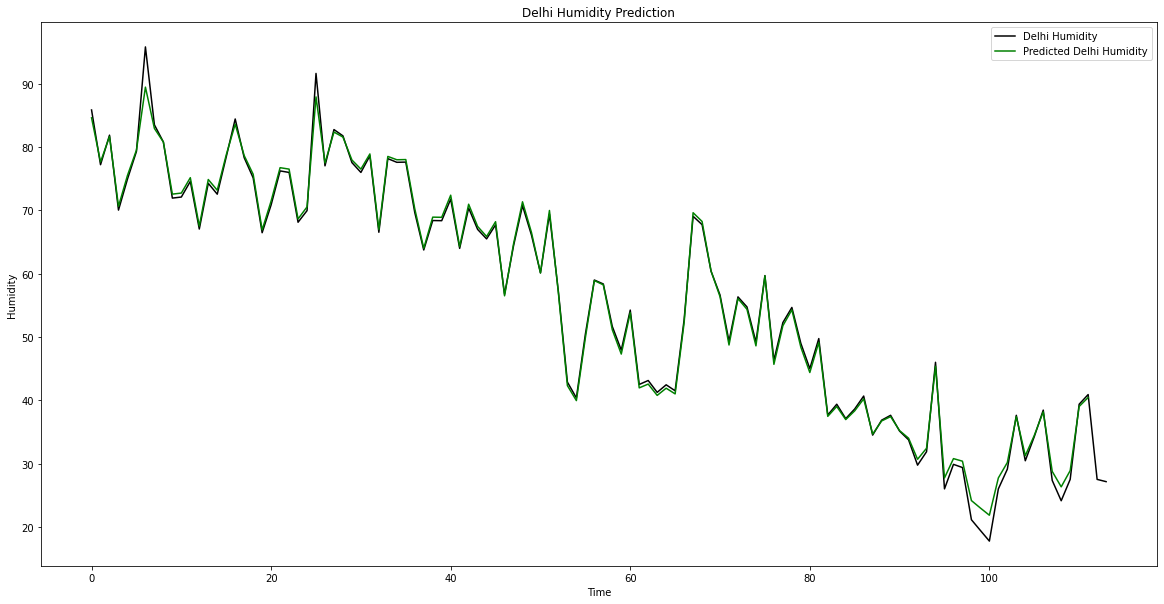

In [30]:
# PREDICTION

prediction = model_temp.predict(testX)
prediction = ss.inverse_transform(prediction)
humid_test = ss.inverse_transform(humid_test)
plt.figure(figsize=(20,10))
plt.plot(humid_test, color = 'black', label = 'Delhi Humidity')
plt.plot(prediction, color = 'green', label = 'Predicted Delhi Humidity')
plt.title('Delhi Humidity Prediction')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()
plt.show()

In [31]:
#Predicting Delhi Wind Speed

## Wind speed column 
wind_train = train.iloc[:,3:4]
wind_test = test.iloc[:,3:4]
#Scaling the values between 0 to 1

wind_train= ss.fit_transform(wind_train)
wind_test= ss.fit_transform(wind_test)
look_back = 1
trainX, trainY = create_dataset(wind_train, look_back)
testX, testY = create_dataset(wind_test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))


In [32]:
# create and fit the LSTM network
model_wind = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_wind.add(LSTM(units = 100, return_sequences = True, input_shape = (trainX.shape[1], 1)))
model_wind.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_wind.add(LSTM(units = 100, return_sequences = True))
model_wind.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_wind.add(LSTM(units = 100, return_sequences = True))
model_wind.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_wind.add(LSTM(units = 50))
model_wind.add(Dropout(0.2))
# Adding the output layer
model_wind.add(Dense(units = 1))

# Compiling the RNN
model_wind.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
model_wind.fit(trainX, trainY, epochs = 100, batch_size = 32)

Epoch 1/100
46/46 [==============================] - 10s 12ms/step - loss: 0.0175 - accuracy: 0.0164
Epoch 2/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0112 - accuracy: 0.0164
Epoch 3/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0100 - accuracy: 0.0164
Epoch 4/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0097 - accuracy: 0.0164
Epoch 5/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0098 - accuracy: 0.0164
Epoch 6/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0097 - accuracy: 0.0164
Epoch 7/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0098 - accuracy: 0.0164
Epoch 8/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0096 - accuracy: 0.0164
Epoch 9/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0095 - accuracy: 0.0164
Epoch 10/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0095 - accuracy: 0.016

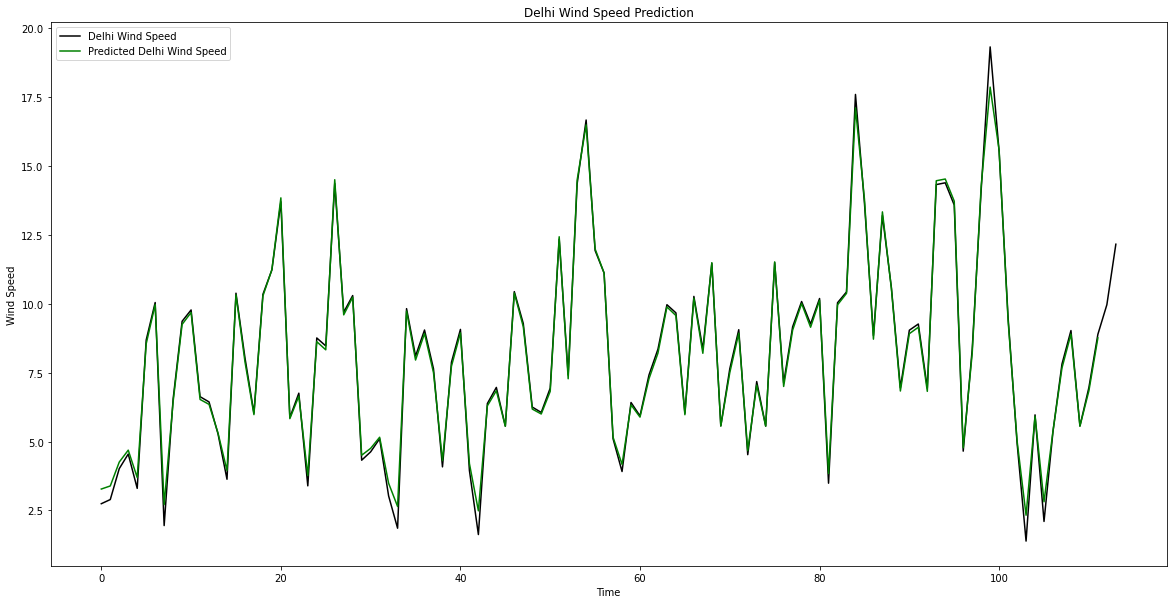

In [33]:
# PREDICTION

prediction = model_temp.predict(testX)
prediction = ss.inverse_transform(prediction)
wind_test = ss.inverse_transform(wind_test)
plt.figure(figsize=(20,10))
plt.plot(wind_test, color = 'black', label = 'Delhi Wind Speed')
plt.plot(prediction, color = 'green', label = 'Predicted Delhi Wind Speed')
plt.title('Delhi Wind Speed Prediction')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

In [34]:
#Predicting Mean Pressure of Delhi

## Mean Pressure column 
pressure_train = train.iloc[:,4:]
pressure_test = test.iloc[:,4:]
#Scaling the values between 0 to 1

pressure_train= ss.fit_transform(pressure_train)
pressure_test= ss.fit_transform(pressure_test)
trainX, trainY = create_dataset(pressure_train, look_back)
testX, testY = create_dataset(pressure_test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))


In [35]:
# create and fit the LSTM network
model_pressure = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_pressure.add(LSTM(units = 100, return_sequences = True, input_shape = (trainX.shape[1], 1)))
model_pressure.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_pressure.add(LSTM(units = 100, return_sequences = True))
model_pressure.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_pressure.add(LSTM(units = 100, return_sequences = True))
model_pressure.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_pressure.add(LSTM(units = 50))
model_pressure.add(Dropout(0.2))
# Adding the output layer
model_pressure.add(Dense(units = 1))

# Compiling the RNN
model_pressure.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
model_pressure.fit(trainX, trainY, epochs = 100, batch_size = 32)

Epoch 1/100
46/46 [==============================] - 10s 11ms/step - loss: 0.0048 - accuracy: 6.8493e-04
Epoch 2/100
46/46 [==============================] - 1s 12ms/step - loss: 6.6296e-04 - accuracy: 6.8493e-04
Epoch 3/100
46/46 [==============================] - 1s 12ms/step - loss: 6.2682e-04 - accuracy: 6.8493e-04
Epoch 4/100
46/46 [==============================] - 1s 12ms/step - loss: 6.2794e-04 - accuracy: 6.8493e-04
Epoch 5/100
46/46 [==============================] - 1s 12ms/step - loss: 6.2324e-04 - accuracy: 6.8493e-04
Epoch 6/100
46/46 [==============================] - 1s 12ms/step - loss: 6.2991e-04 - accuracy: 6.8493e-04
Epoch 7/100
46/46 [==============================] - 1s 12ms/step - loss: 6.2122e-04 - accuracy: 6.8493e-04
Epoch 8/100
46/46 [==============================] - 1s 12ms/step - loss: 6.2109e-04 - accuracy: 6.8493e-04
Epoch 9/100
46/46 [==============================] - 1s 12ms/step - loss: 6.1256e-04 - accuracy: 6.8493e-04
Epoch 10/100
46/46 [===========

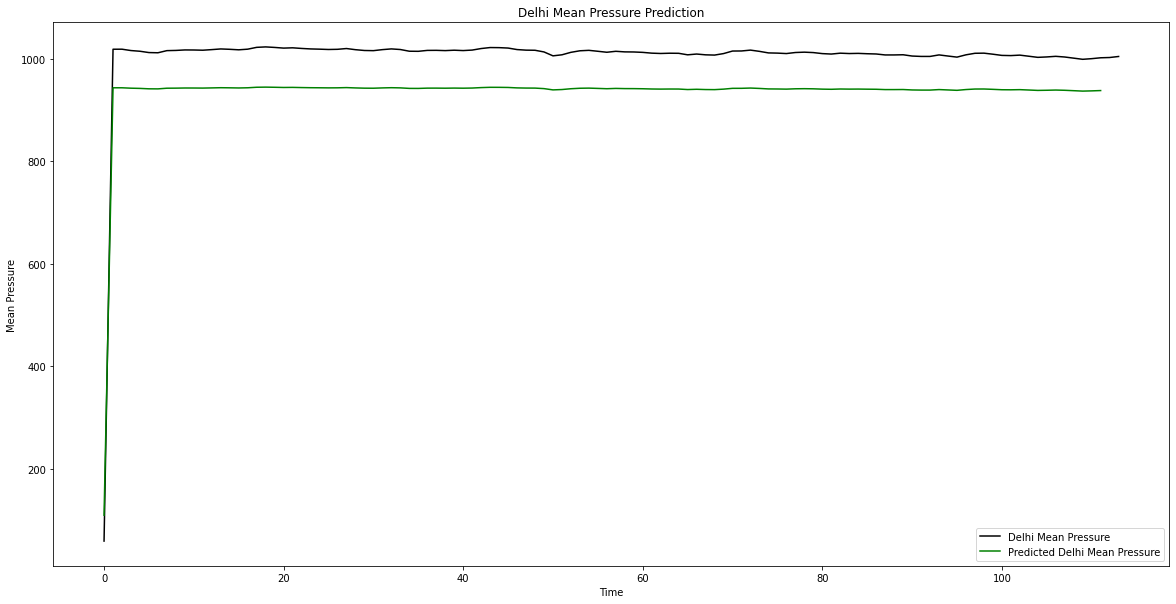

In [36]:
# PREDICTION

prediction = model_temp.predict(testX)
prediction = ss.inverse_transform(prediction)
pressure_test = ss.inverse_transform(pressure_test)
plt.figure(figsize=(20,10))
plt.plot(pressure_test, color = 'black', label = 'Delhi Mean Pressure')
plt.plot(prediction, color = 'green', label = 'Predicted Delhi Mean Pressure')
plt.title('Delhi Mean Pressure Prediction')
plt.xlabel('Time')
plt.ylabel('Mean Pressure')
plt.legend()
plt.show()